<a href="https://colab.research.google.com/github/whynotkush/SMAI/blob/main/MLP_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>MNIST Image Classification Using Multilayer Perceptron (MLP)</h2>

In this notebook, we will classify small images MNIST dataset from tensorflow keras datasets. 

In [ ]:
# Imports
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

*Load the data*

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

Let's plot some images to see what they are

In [ ]:
import matplotlib.pyplot as plt
def plot_sample(X, y, index):
    plt.figure()
    plt.imshow(X[index])
    plt.grid(False)
    plt.axis('off')
    plt.title("Label : "+str(y[index]))

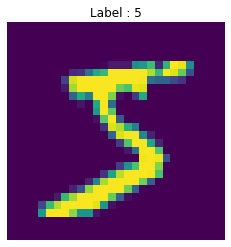

In [ ]:
plot_sample(X_train, y_train, 0)

## Part 1

In [ ]:
import numpy as np
labels = np.unique(y_train)
print("labels :",labels)

labels : [0 1 2 3 4 5 6 7 8 9]


*converting y into one-hot form*

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
test_labels.shape

(10000, 10)

*Reshape the data - MLPs takes single list as argument*

*Reshape to 28 x 28 = 784 features*

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = x_test.reshape(X_test.shape[0], 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

*Convert into greyscale*

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
input_size = 784

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Activation, Dropout

# Parameters 
dropout = 0.45

# MLP ReLU Dropout 
model = Sequential([

layers.Dense(256, input_dim=input_size, activation='relu') ,
layers.Dropout(dropout),

layers.Dense(256,activation='relu' ),
layers.Dropout(dropout),

layers.Dense(10, activation='softmax')

])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, train_labels, epochs=20, batch_size=600)

Epoch 1/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0705 - accuracy: 0.9783
Epoch 2/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0628 - accuracy: 0.9792
Epoch 3/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0592 - accuracy: 0.9806
Epoch 4/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0568 - accuracy: 0.9826
Epoch 5/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0558 - accuracy: 0.9816
Epoch 6/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0518 - accuracy: 0.9833
Epoch 7/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0507 - accuracy: 0.9837
Epoch 8/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0442 - accuracy: 0.9856
Epoch 9/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 10/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0434 - accura

In [ ]:
res_ = model.evaluate(X_test,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0700 - accuracy: 0.9830


In [ ]:
print("Loss : " , res_[0])

Loss :  0.06995627284049988


In [ ]:
print("Accuracy : " , res_[1])

Accuracy :  0.9829999804496765


### Testing with different optimizers

#### RMS prop

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [ ]:
model.fit(X_train, train_labels, epochs=20, batch_size=600)

Epoch 1/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0341 - accuracy: 0.9886
Epoch 2/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0312 - accuracy: 0.9895
Epoch 3/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0293 - accuracy: 0.9902
Epoch 4/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0311 - accuracy: 0.9896
Epoch 5/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 6/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0293 - accuracy: 0.9903
Epoch 7/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 8/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0301 - accuracy: 0.9903
Epoch 9/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0279 - accuracy: 0.9909
Epoch 10/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0272 - accura

In [ ]:
res_rms = model.evaluate(X_test,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0953 - accuracy: 0.9830


In [ ]:
print("Loss : " , res_rms[0])

Loss :  0.09525398164987564


In [ ]:
print("Accuracy : " , res_rms[1])

Accuracy :  0.9829999804496765


#### SGD with momentum

In [ ]:
opt = tensorflow.keras.optimizers.SGD(learning_rate=0.1 , momentum = 0.9)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(X_train, train_labels, epochs=20, batch_size=600)

Epoch 1/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 2/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0322 - accuracy: 0.9896
Epoch 3/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0325 - accuracy: 0.9889
Epoch 4/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0302 - accuracy: 0.9898
Epoch 5/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0305 - accuracy: 0.9897
Epoch 6/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0291 - accuracy: 0.9906
Epoch 7/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0284 - accuracy: 0.9908
Epoch 8/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0277 - accuracy: 0.9905
Epoch 9/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 10/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0291 - accura

In [ ]:
res_sgd_m = model.evaluate(X_test,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0771 - accuracy: 0.9833


In [ ]:
print("Loss : " , res_sgd_m[0])

Loss :  0.07706351578235626


In [ ]:
print("Accuracy : " , res_sgd_m[1])

Loss :  0.983299970626831


#### SGD without Momentum

In [ ]:
opt_ = tensorflow.keras.optimizers.SGD(learning_rate = 0.1 , momentum = 0.0)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt_, metrics=['accuracy'])

In [ ]:
model.fit(X_train, train_labels, epochs=20, batch_size=600)

Epoch 1/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0201 - accuracy: 0.9929
Epoch 2/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 3/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 4/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0143 - accuracy: 0.9953
Epoch 5/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 6/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0141 - accuracy: 0.9953
Epoch 7/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0130 - accuracy: 0.9956
Epoch 8/20
100/100 [==============================] - 2s 17ms/step - loss: 0.0123 - accuracy: 0.9956
Epoch 9/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 10/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0146 - accura

In [ ]:
res_sgd = model.evaluate(X_test,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0806 - accuracy: 0.9846


In [ ]:
print("Loss : " , res_sgd[0])

Loss :  0.08064835518598557


In [ ]:
print("Accuracy : " , res_sgd[1])

Loss :  0.9846000075340271


### Trying with different weight initialisations

#### Xavier uniform OR Glorot uniform

In [ ]:
initializer = tensorflow.keras.initializers.GlorotUniform()

In [ ]:
# Parameters 
dropout = 0.45

# MLP ReLU Dropout 
model_xavier = Sequential([

layers.Dense(256, input_dim=input_size, activation='relu',kernel_initializer=initializer) ,
layers.Dropout(dropout),

layers.Dense(256,activation='relu',kernel_initializer=initializer ),
layers.Dropout(dropout),

layers.Dense(10 , activation='softmax')

])

In [ ]:
opt = tensorflow.keras.optimizers.SGD(learning_rate=0.1 , momentum = 0.9)
model_xavier.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model_xavier.fit(X_train, train_labels, epochs=20, batch_size=600)

Epoch 1/20
100/100 [==============================] - 2s 17ms/step - loss: 1.0829 - accuracy: 0.6370
Epoch 2/20
100/100 [==============================] - 2s 17ms/step - loss: 0.2701 - accuracy: 0.9191
Epoch 3/20
100/100 [==============================] - 2s 17ms/step - loss: 0.2093 - accuracy: 0.9373
Epoch 4/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1700 - accuracy: 0.9489
Epoch 5/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1547 - accuracy: 0.9537
Epoch 6/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1360 - accuracy: 0.9592
Epoch 7/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1296 - accuracy: 0.9603
Epoch 8/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1178 - accuracy: 0.9642
Epoch 9/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1097 - accuracy: 0.9665
Epoch 10/20
100/100 [==============================] - 2s 17ms/step - loss: 0.1036 - accura

In [ ]:
res_xavier = model_xavier.evaluate(X_test,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0693 - accuracy: 0.9806


In [ ]:
print("Loss : " , res_xavier[0])

Loss :  0.06927978992462158


In [ ]:
print("Accuracy : " , res_xavier[1])

Accuracy :  0.9805999994277954


#### Xavier Normal OR Glorot Normal

In [ ]:
initializer1 = tensorflow.keras.initializers.GlorotNormal()

In [ ]:
# Parameters 
dropout = 0.45

# MLP ReLU Dropout 
model_xavier_n = Sequential([

layers.Dense(256, input_dim=input_size, activation='relu',kernel_initializer=initializer1) ,
layers.Dropout(dropout),

layers.Dense(256,activation='relu',kernel_initializer=initializer1 ),
layers.Dropout(dropout),

layers.Dense(10 , activation='softmax')

])

In [ ]:
opt1 = tensorflow.keras.optimizers.SGD(learning_rate=0.1 , momentum = 0.9)
model_xavier_n.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])

In [ ]:
model_xavier_n.fit(X_train, train_labels, epochs=20, batch_size=600)

Epoch 1/20
100/100 [==============================] - 2s 16ms/step - loss: 1.0812 - accuracy: 0.6383
Epoch 2/20
100/100 [==============================] - 2s 17ms/step - loss: 0.2706 - accuracy: 0.9185
Epoch 3/20
100/100 [==============================] - 2s 16ms/step - loss: 0.2066 - accuracy: 0.9380
Epoch 4/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1728 - accuracy: 0.9488
Epoch 5/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1543 - accuracy: 0.9525
Epoch 6/20
100/100 [==============================] - 2s 17ms/step - loss: 0.1369 - accuracy: 0.9577
Epoch 7/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1267 - accuracy: 0.9612
Epoch 8/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1161 - accuracy: 0.9644
Epoch 9/20
100/100 [==============================] - 2s 17ms/step - loss: 0.1120 - accuracy: 0.9649
Epoch 10/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1023 - accura

In [ ]:
res_xavier_n = model_xavier_n.evaluate(X_test,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0662 - accuracy: 0.9802


In [ ]:
print("Loss : " , res_xavier_n[0])

Loss :  0.0661640614271164


In [ ]:
print("Accuracy : " , res_xavier_n[1])

Accuracy :  0.9801999926567078


### Trying different learning rates and performing exponential annealing on the learning rate.

The amount that the weights are updated during training of a Neural Network is referred to as the step size or the “learning rate.”

Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0 .

In [ ]:
import matplotlib.pyplot as plt

def mlp( X_t , y_t , l_rate) :

  model = Sequential([

  layers.Dense(256, input_dim=input_size, activation='relu') ,
  layers.Dropout(dropout),

  layers.Dense(256,activation='relu' ),
  layers.Dropout(dropout),

  layers.Dense(10 , activation='softmax')
  ])

  # compile model
  opt = tensorflow.keras.optimizers.SGD(learning_rate=l_rate , momentum = 0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # fit model
  history = model.fit(X_t, y_t ,validation_data=(X_test, test_labels) ,epochs=20, batch_size=600,verbose=0)
  
  #evaluate
  result = model.evaluate(X_test,test_labels,verbose=0)
  
  # plot learning curves
  plt.plot(history.history['loss'], label='train data')
  plt.plot(history.history['val_loss'], label='test data')
  plt.xlabel('Epoch',color='grey',fontsize=14)
  plt.ylabel('Loss',color='grey',fontsize=14)
  plt.legend(loc='upper right')
  plt.title('\nlearning rate = '+str(l_rate)+"\nLoss : "+str(result[0])+"\nAccuracy : "+str(result[1]) ,pad = -10)

  return model

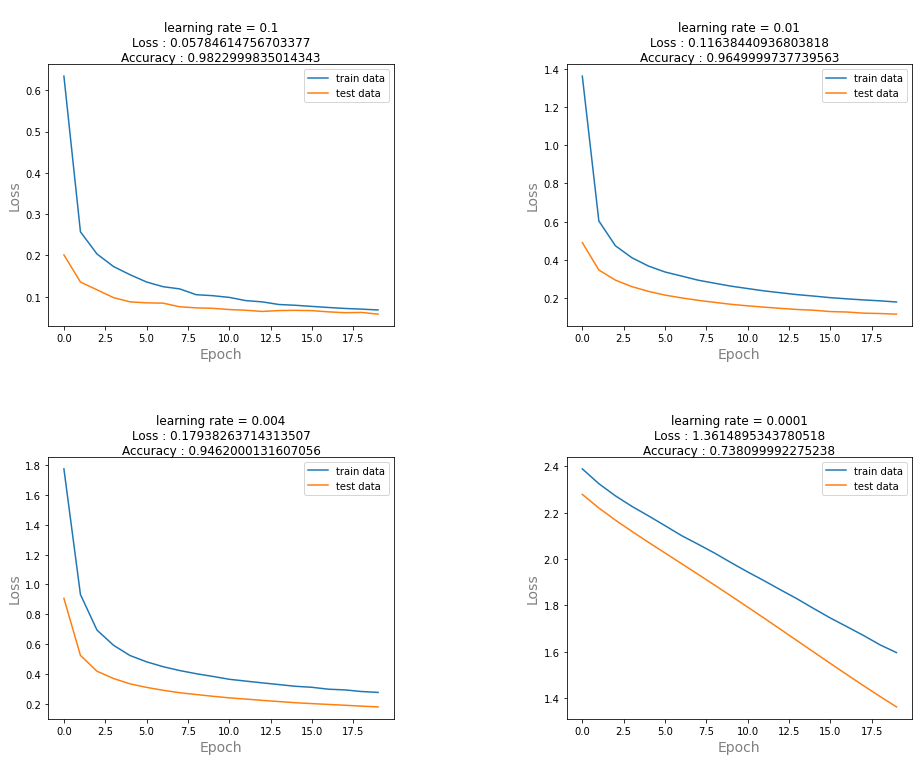

In [ ]:
# create learning curves for different learning rates
learning_rates = [1E-1, 1E-2, 4E-3, 1E-4]
models_ = list() 
histories = list()
plt.figure(figsize=(15,25))
for i in range(len(learning_rates)) :
  # determine the plot number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  l = learning_rates[i]
  model = mlp(X_train , train_labels , l)
  models_.append(model)
  plt.subplots_adjust(wspace=0.5)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.5)
plt.show()

As we can see from the above graphs , Learning rate plays a huge role in determining the accuracy and loss of a model. 

Too small learning rate results in larger loss and lesser accuracy .

### Saving the model

In [ ]:
model.save('/content/drive/MyDrive/SMAI/assgn3/q3')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SMAI/assgn3/q3/assets


*Loading the model*

In [ ]:
new_model = tensorflow.keras.models.load_model('/content/drive/MyDrive/SMAI/assgn3/q3')

*Model Summary*

In [ ]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_pred = new_model.predict(X_test)

In [ ]:
new_pred.shape

(10000, 10)

*Reverse Transforming the pred_ from one-hot form to numeric values*

In [ ]:
new_pred = np.argmax(new_pred,axis=-1)
new_pred.shape

(10000,)

*Plotting predicted label for test image at index 3*

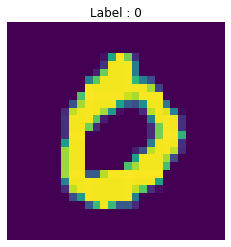

In [ ]:
plot_sample(x_test, new_pred,3)

##Part 2

<h2 style='color:blue' align='center'>MLP Autoencoder as a Classifier</h2>

In [ ]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# define dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# scale data
X_train = X_train / 255.0
X_test = X_test / 255.0
# X_train = t.transform(X_train)
# X_test = t.transform(X_test)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_test = X_test.reshape(10000,784)

In [ ]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
y_train.shape, y_test.shape

((60000, 1), (10000, 1))

In [ ]:
X_train = X_train.reshape(60000,784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
n_inputs = 784
# define encoder
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)

# define autoencoder model
model = Model(inputs=visible, outputs=output)

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=10, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/10
3750/3750 - 161s - loss: 0.0261 - val_loss: 0.0159
Epoch 2/10
3750/3750 - 160s - loss: 0.0149 - val_loss: 0.0128
Epoch 3/10
3750/3750 - 160s - loss: 0.0121 - val_loss: 0.0087
Epoch 4/10
3750/3750 - 160s - loss: 0.0105 - val_loss: 0.0087
Epoch 5/10
3750/3750 - 159s - loss: 0.0095 - val_loss: 0.0069
Epoch 6/10
3750/3750 - 159s - loss: 0.0089 - val_loss: 0.0068
Epoch 7/10
3750/3750 - 158s - loss: 0.0084 - val_loss: 0.0061
Epoch 8/10
3750/3750 - 159s - loss: 0.0080 - val_loss: 0.0064
Epoch 9/10
3750/3750 - 160s - loss: 0.0078 - val_loss: 0.0056
Epoch 10/10
3750/3750 - 161s - loss: 0.0076 - val_loss: 0.0058


In [ ]:
import numpy as np
validation_loss = history.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.008364966185763479


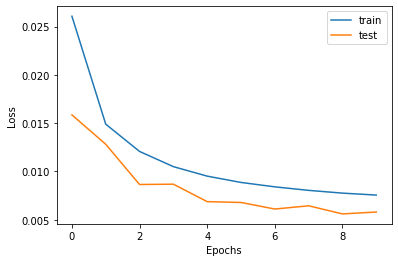

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.show()

In [ ]:
pred_x1 = model.predict(X_test)
pred_x1.shape

(10000, 784)

In [ ]:
pred_x1=pred_x1.reshape(10000,28,28)

(-0.5, 27.5, 27.5, -0.5)

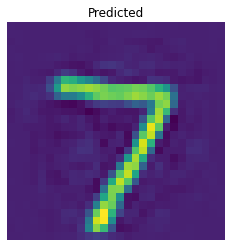

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(pred_x1[0])
plt.title('Predicted')
plt.grid(False)
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

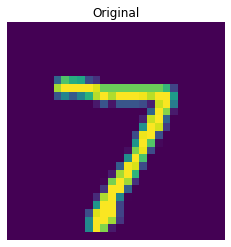

In [ ]:
plt.figure()
plt.imshow(X_test[0].reshape(28,28))
plt.title('Original')
plt.grid(False)
plt.axis('off')

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

In [ ]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

In [ ]:
X_train_encode.shape , X_test_encode.shape

((60000, 784), (10000, 784))

Passing x_train_encode and X_test_encode into a MLP Classifier 

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Activation, Dropout

# Parameters 
dropout = 0.3

# MLP ReLU Dropout 
model_mlp = Sequential([

layers.Dense(256, input_dim=784, activation='relu') ,
layers.Dropout(dropout),

layers.Dense(256,activation='relu' ),
layers.Dropout(dropout),

layers.Dense(10, activation='softmax')

])

In [ ]:
model_mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

*Converting labels into one-hot form to be able to use categorical_crossentropy*

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
train_labels.shape , test_labels.shape , X_train_encode.shape , X_test_encode.shape

((60000, 10), (10000, 10), (60000, 784), (10000, 784))

##### Fit into the MLP Classifier with Autoencoder trained train and test data and Report Accuracy

In [ ]:
hist_ae_mlp = model_mlp.fit(X_train_encode, train_labels, epochs=10,validation_data=(X_test_encode,test_labels), batch_size=600)

Epoch 1/10
100/100 [==============================] - 2s 20ms/step - loss: 3.9999 - accuracy: 0.5289 - val_loss: 0.3133 - val_accuracy: 0.9069
Epoch 2/10
100/100 [==============================] - 2s 18ms/step - loss: 0.4682 - accuracy: 0.8624 - val_loss: 0.2249 - val_accuracy: 0.9358
Epoch 3/10
100/100 [==============================] - 2s 18ms/step - loss: 0.3184 - accuracy: 0.9055 - val_loss: 0.1815 - val_accuracy: 0.9472
Epoch 4/10
100/100 [==============================] - 2s 18ms/step - loss: 0.2646 - accuracy: 0.9219 - val_loss: 0.1572 - val_accuracy: 0.9546
Epoch 5/10
100/100 [==============================] - 2s 18ms/step - loss: 0.2271 - accuracy: 0.9319 - val_loss: 0.1451 - val_accuracy: 0.9598
Epoch 6/10
100/100 [==============================] - 2s 18ms/step - loss: 0.2010 - accuracy: 0.9408 - val_loss: 0.1359 - val_accuracy: 0.9620
Epoch 7/10
100/100 [==============================] - 2s 18ms/step - loss: 0.1789 - accuracy: 0.9458 - val_loss: 0.1242 - val_accuracy: 0.9643

In [ ]:
res_ae_mlp = model_mlp.evaluate(X_test_encode,test_labels , verbose = 0)

In [ ]:
print("Loss :",res_ae_mlp[0])

Loss : 0.11024092137813568


In [ ]:
print("Accuracy :",res_ae_mlp[1])

Accuracy : 0.9678000211715698


##### Fit into the MLP Classifier with Normal train and test data and Report Accuracy

In [ ]:
opt = tensorflow.keras.optimizers.SGD(learning_rate=0.1 , momentum = 0.9)
model_mlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
hist_mlp = model_mlp.fit(X_train, train_labels, epochs=10,validation_data=(X_test,test_labels), batch_size=600)

Epoch 1/10
100/100 [==============================] - 2s 20ms/step - loss: 0.4441 - accuracy: 0.8657 - val_loss: 0.1645 - val_accuracy: 0.9495
Epoch 2/10
100/100 [==============================] - 2s 18ms/step - loss: 0.2038 - accuracy: 0.9390 - val_loss: 0.1138 - val_accuracy: 0.9649
Epoch 3/10
100/100 [==============================] - 2s 18ms/step - loss: 0.1525 - accuracy: 0.9535 - val_loss: 0.1000 - val_accuracy: 0.9686
Epoch 4/10
100/100 [==============================] - 2s 18ms/step - loss: 0.1248 - accuracy: 0.9618 - val_loss: 0.0838 - val_accuracy: 0.9737
Epoch 5/10
100/100 [==============================] - 2s 18ms/step - loss: 0.1024 - accuracy: 0.9688 - val_loss: 0.0804 - val_accuracy: 0.9745
Epoch 6/10
100/100 [==============================] - 2s 18ms/step - loss: 0.0906 - accuracy: 0.9731 - val_loss: 0.0704 - val_accuracy: 0.9781
Epoch 7/10
100/100 [==============================] - 2s 18ms/step - loss: 0.0851 - accuracy: 0.9743 - val_loss: 0.0734 - val_accuracy: 0.9780

In [ ]:
res_mlp = model_mlp.evaluate(X_test,test_labels , verbose = 0)

In [ ]:
print("Loss :",res_mlp[0])

Loss : 0.06515146046876907


In [ ]:
print("Loss :",res_mlp[1])

Loss : 0.9790999889373779


In [ ]:
pred = model_mlp.predict(X_test)

Converting back from one-hot form

In [ ]:
pred = np.argmax(pred,axis=-1)
pred.shape

(10000,)

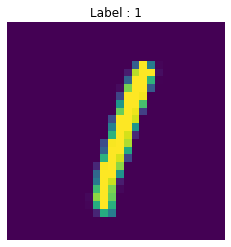

In [ ]:
plot_sample(x_test, pred,5)